# カイ二乗の値

このレクチャーでは、カイ二乗の値について説明します。


100回コインを投げると、50回表が出て、50回裏がでます。もちろん、いつもちょうど50回ずつになるわけではないので、実際に観測された値が、ありえるズレなのか、どうかを統計的に検討できると便利です。

こんなときに使われるのが、カイ二乗分布です。カイは、ギリシャ文字のχです。

<table>
<tr>
<th>Event</th>
<th>Event 1</th>
<th>Event 2</th>
<th>Event 3</th>
<th>...</th>
<th>Event k</th>
</tr>
<tr>
<td>観測値（Observed Frequency）</td>
<td>$$o_1$$</td>
<td>$$o_2$$</td>
<td>$$o_3$$</td>
<td>...</td>
<td>$$o_k$$</td>
</tr>
<tr>
<td>予測される値（Expected Frequency）</td>
<td>$$e_1$$</td>
<td>$$e_2$$</td>
<td>$$e_3$$</td>
<td>...</td>
<td>$$e_k$$</td>
</tr>
</table>

例えば、あとで出てくる例では、2つのサイコロの目合計値が考えられます。合計値が2になるのは、1/36なので、72回サイコロを投げれば、2回くらいというのが、予測される値という分けです。

カイ二乗値は、観測と予測のズレを足し合わせたイメージです。
$$ \chi ^2 =  \frac{(o_1 - e_1)^2}{e_1}+\frac{(o_2 - e_2)^2}{e_2}+...+\frac{(o_k - e_k)^2}{e_k} $$
書き方の問題ですが:
$$\chi ^2 = \sum^{k}_{j=1} \frac{(o_j - e_j)^2}{e_j} $$

### カイ二乗分布

（少し厳密さに欠けますが）このχ<sup>2</sup>の値が従うのが、自由度kのχ二乗分布です。

自由度kが大きくなると、ピークがだんだん右にずれるのが分かると思います。

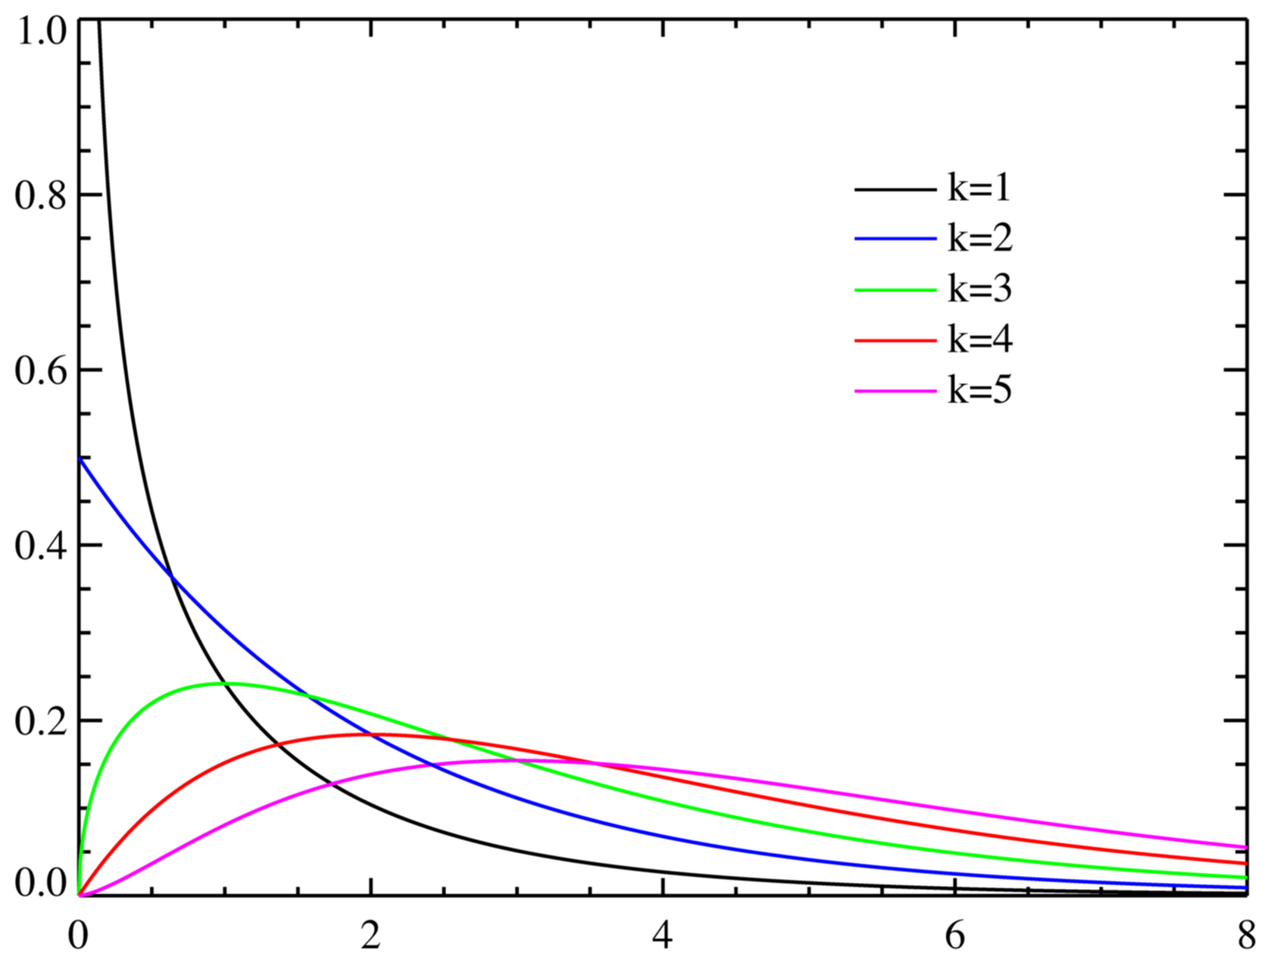

In [4]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/1280px-Chi-square_distributionPDF.png'

from IPython.display import Image
Image(url)

### カイ二乗適合度検定（The Chi Square Test for Goodness of Fit）

この分布を使ってできる検定が、カイ二乗検定です。

計算はscipyがやってくれますので、まずは次のような例題を考えてみましょう。

あなたは、カジノで使われているサイコロが、いかさまではないか？と疑っています。これを、カイ二乗検定で確かめてみましょう。

500回のサイコロの2つの合計値を記録したものが、次の表です。

<table>
<td>合計値</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
<tr>
<td>観測された回数</td>
<td>8</td>
<td>32</td>
<td>48</td>
<td>59</td>
<td>67</td>
<td>84</td>
<td>76</td>
<td>57</td>
<td>34</td>
<td>28</td>
<td>7</td>
</tr>
</table>

理想的なサイコロの合計値の頻度は次のようになるでしょう。

<table>
<td>合計値</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
</tr>
<tr>
<td>予想される頻度</td>
<td>1/36</td>
<td>2/36</td>
<td>3/36</td>
<td>4/36</td>
<td>5/36</td>
<td>6/36</td>
<td>5/36</td>
<td>4/36</td>
<td>3/36</td>
<td>2/36</td>
<td>1/36</td>
</tr>
</table>

500回という回数をかければ、よそうされる回数を計算できます。

In [1]:
observed = [8,32,48,59,67,84,76,57,34,28,7]
roll_sum = sum(observed)
roll_sum

500

In [2]:
# 予想される頻度です。
freq = [1,2,3,4,5,6,5,4,3,2,1]

# Python2では、1.0としてください。
possible_rolls = 1/36

freq = [possible_rolls*dice for dice in freq]

freq

[0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.08333333333333333,
 0.05555555555555555,
 0.027777777777777776]

全体が500回なので、かけ算します。

In [3]:
expected = [roll_sum*f for f in freq]
expected

[13.888888888888888,
 27.777777777777775,
 41.666666666666664,
 55.55555555555555,
 69.44444444444444,
 83.33333333333333,
 69.44444444444444,
 55.55555555555555,
 41.666666666666664,
 27.777777777777775,
 13.888888888888888]

Scipyのカイ二乗検定を使えます。[Chi Square Test](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chisquare.html) 

In [9]:
from scipy import stats

chisq,p = stats.chisquare(observed,expected)

print('カイ二乗統計量= {:0.2f}'.format(chisq))
print('P値 = {:0.2f}'.format(p))

カイ二乗統計量= 9.89
P値 = 0.45


stats.chisquareは、統計量とP値を同時に返してくれます。

P値がだいぶ高いので、サイコロはいかさまではなさそうです。